In [3]:
import pandas as pd

benin = pd.read_csv('benin_clean.csv', parse_dates=['Timestamp'])
togo = pd.read_csv('togo_clean.csv', parse_dates=['Timestamp'])
sierra = pd.read_csv('sierraleone_clean.csv', parse_dates=['Timestamp'])

# Add country labels for later use
benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierra['Country'] = 'Sierra Leone'

# Combine all into one DataFrame
df_all = pd.concat([benin, togo, sierra], ignore_index=True)


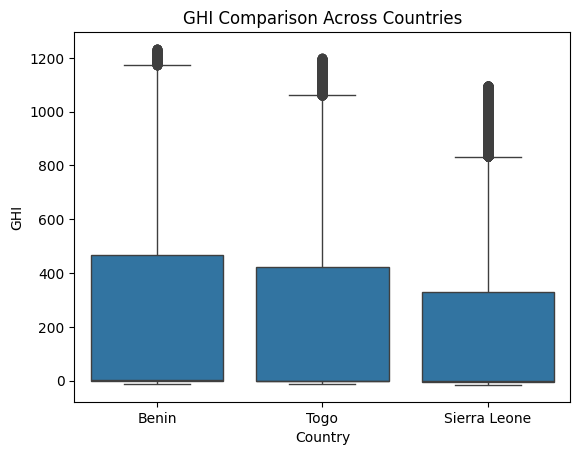

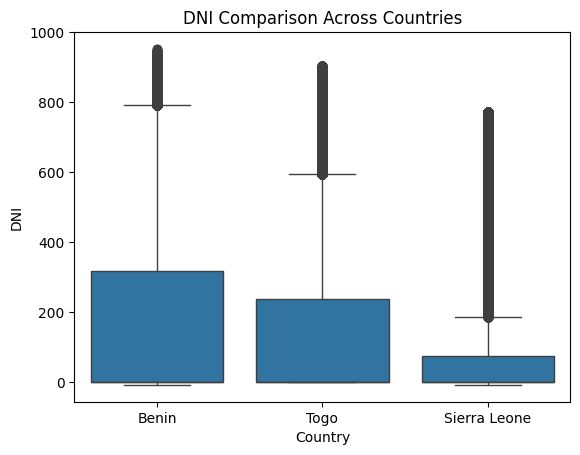

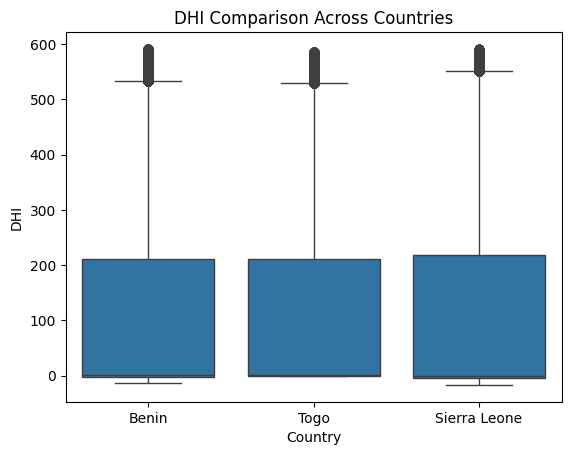

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

for metric in ['GHI', 'DNI', 'DHI']:
    sns.boxplot(data=df_all, x='Country', y=metric)
    plt.title(f'{metric} Comparison Across Countries')
    plt.show()


In [5]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierra Leone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo          223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         153.10  
Sierra Leone  153.69  
Togo          151.57

In [6]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(
    benin['GHI'].dropna(),
    togo['GHI'].dropna(),
    sierra['GHI'].dropna()
)

print(f"ANOVA Test: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")


ANOVA Test: F-statistic = 3833.18, p-value = 0.0000


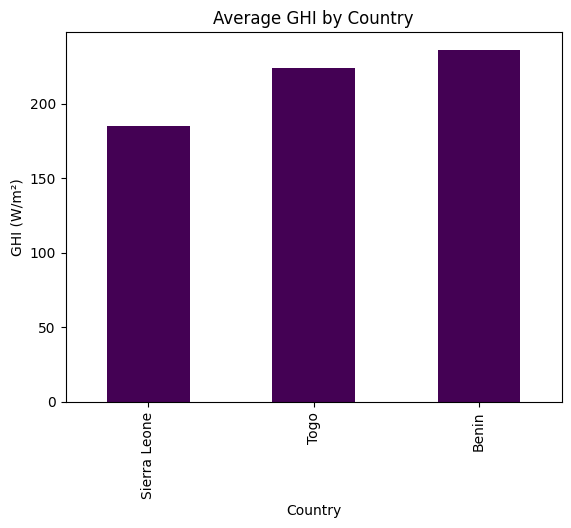

In [7]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values()

avg_ghi.plot(kind='bar', title='Average GHI by Country', ylabel='GHI (W/m²)', xlabel='Country', colormap='viridis')
plt.show()
